<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Normalized_ORG_RUN_Regression_Spatial_temporal_graph_neural_networkV2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 84.9 GB  |     Proc size: 3.3 GB
GPU RAM Free: 39968MB | Used: 545MB | Util   1% | Total     40960MB


In [1]:
!pip install lightning torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 29.8 MB/s eta 0:00:00


In [ ]:
!pip install torch --upgrade

In [ ]:
!pip uninstall torch torchvision torchaudio transformers


Found existing installation: torch 2.2.0
Uninstalling torch-2.2.0:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.2.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.2.0
Found existing installation: torchvision 0.16.0+cu121
Uninstalling torchvision-0.16.0+cu121:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchvision-0.16.0+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libcudart.7ec1eba6.so.12
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libnvjpeg.f00ca762.so.12
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libpng16.7f

In [ ]:
!pip install torch torchvision torchaudio transformers

  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl (755.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 100.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torch<2.2,>=1.10, but you have torch 2.2.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.


In [2]:
# Standard libraries
import os

# For downloading pre-trained models
import urllib.request
from urllib.error import HTTPError

# PyTorch Lightning
import lightning as L

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# PyTorch geometric
import torch_geometric
import torch_geometric.data as geom_data
import torch_geometric.nn as geom_nn

# PL callbacks
from lightning.pytorch.callbacks import ModelCheckpoint
from torch import Tensor

AVAIL_GPUS = min(1, torch.cuda.device_count())
#BATCH_SIZE = 256 if AVAIL_GPUS else 64
BATCH_SIZE = 1 if AVAIL_GPUS else 64
# Path to the folder where the datasets are/should be downloaded
DATASET_PATH = os.environ.get("PATH_DATASETS", "data/")
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "/content/drive/MyDrive/DroughtCastAI/Dataset/GNNs"

# Setting the seed
L.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Import Graph

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pickle
# spatial-temporal edges
Graph = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedX1.pickle', 'rb'))

# spatial-temporal edges
Graphy = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'rb'))

In [5]:
Graph.nodes[36986]

{'row_index': 36986,
 'Month': 202211,
 'Lat': -33.238,
 'Lon': 18.865,
 'Lat_nom': 0.0,
 'Lon_nom': 0.5263211858448558,
 'temperature_2m': 0.4952498070987658,
 'temperature_2m_min': 0.5546942683872143,
 'temperature_2m_max': 0.6508211317768104,
 'dewpoint_temperature_2m': 0.604377704250445,
 'total_precipitation_sum': 0.0144451848511847,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.0178303713389214,
 'u_component_of_wind_10m': 0.5135674951104923,
 'v_component_of_wind_10m': 0.4987945801799406,
 'surface_net_solar_radiation_sum': 0.7802372071127209,
 'total_evaporation_sum': 0.8615671690632722,
 'soil_moisture_am': 0.1431131537144707,
 'soil_moisture_pm': 0.1428330811346103,
 'NDVI': 0.3818963898195212,
 'EVI': 0.291882789894304,
 'next_month_tempreature': 0.4275101180905905,
 'next_month_precipitation': 0.0111730676234768,
 'year': 0.875,
 'month2': 0.9090909090909092,
 'spei01': 0.4039815,
 'next_month_soil_moisture_am': 0.210090837587329,
 'next_month_spei01': 0.68

In [6]:
len(Graph.nodes)

83580

In [7]:
len(Graph.nodes[36986])

28

**Convert Graph into pytorch geometric dataset**

1. Create torch_geometric.data

In [61]:
#EDGE INDEX FOR FULL DATASET
# Extract edge list
edge_list = list(Graph.edges())




# Convert edge list to a 2D tensor
edge_index = torch.tensor(edge_list, dtype=torch.long)
edge_index = edge_index.t().contiguous()

# Ensure the tensor shape is [2, num_edges]

edge_index = edge_index.view(2, -1)


spei01_features = [Graph.nodes[node]['next_month_spei01'] for node in Graph.nodes()]



# Convert to a tensor
y = torch.tensor(spei01_features, dtype=torch.float)

#feature_names = [ 'Lat_nom', 'Lon_nom', 'temperature_2m', 'temperature_2m_min',
#                 'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
#                 'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
#                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
#                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
#                 'next_month_precipitation', 'year', 'month2', "spei01"]

feature_names = [  'temperature_2m',  'u_component_of_wind_10m',
                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
                 'next_month_precipitation',    'spei01' ]

# feature_names = [   'temperature_2m', 'temperature_2m_min',
#                 'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
#                 'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
#                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
#                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
#                 'next_month_precipitation',   "spei01"]


#Extract the features for each node
node_features = []
for node in Graph.nodes():
    node_feature_values = [Graph.nodes[node].get(feature) for feature in feature_names]  # Defaulting missing values to 0
    node_features.append(node_feature_values)

# Convert to a PyTorch tensor
x = torch.tensor(node_features, dtype=torch.float)



train_months = [201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
202009, 202010, 202011, 202012, 202101, 202102]
val_months = [202103, 202104, 202105, 202106, 202107, 202108, 202109,
202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205]
test_months = [202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308]


# train_months = [201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
# 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
# 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
# 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
# 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
# 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
# 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
# 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
# 202009, 202010, 202011, 202012, 202101, 202102, 202104, 202106,
# 202108,202110, 202112, 202202, 202204, 202207, 202209,202211,202301,202303, 202305,202307]
# test_months = [202103, 202105,  202107, 202109,
# 202111, 202201, 202203, 202205]
# val_months = [202206, 202208, 202210,   202212,   202302,  202304,  202306, 202307, 202308]

emb_months=[201505]
emb_mask_list = []

for node in Graph.nodes():
    is_in_emb_months = Graph.nodes[node]['Month'] in emb_months
    emb_mask_list.append(is_in_emb_months)

emb_mask = torch.tensor(emb_mask_list, dtype=torch.bool)
train_mask_list = []

for node in Graph.nodes():
    is_in_train_months = Graph.nodes[node]['Month'] in train_months
    train_mask_list.append(is_in_train_months)

train_mask = torch.tensor(train_mask_list, dtype=torch.bool)

val_mask_list = []

for node in Graph.nodes():
    is_in_val_months = Graph.nodes[node]['Month'] in val_months
    val_mask_list.append(is_in_val_months)

val_mask = torch.tensor(val_mask_list, dtype=torch.bool)

test_mask_list = []

for node in Graph.nodes():
    is_in_test_months = Graph.nodes[node]['Month'] in test_months
    test_mask_list.append(is_in_test_months)

test_mask = torch.tensor(test_mask_list, dtype=torch.bool)

graph_data = torch_geometric.data.Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask, emb_mask=emb_mask)

In [62]:
graph_data

Data(x=[83580, 12], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [12]:
print(train_mask)

tensor([ True,  True,  True,  ..., False, False, False])


2. Create dataset

In [63]:
from torch.utils.data import Dataset, DataLoader

In [64]:
class GraphDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.num_node_features = data.x.size(1)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        return self.data

In [65]:
graph_dataset = GraphDataset(graph_data)

In [66]:
graph_dataset.data

Data(x=[83580, 12], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [67]:
graph_dataset.__getitem__(0)

Data(x=[83580, 12], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [68]:
graph_dataset.num_node_features

12

## Graph Neural Network

**1. Setup GNN Module**

In [20]:
gnn_layer_by_name = {"GCN": geom_nn.GCNConv, "GAT": geom_nn.GATConv, "GraphConv": geom_nn.GraphConv, "SAGEConv": geom_nn.SAGEConv, "GAT2": geom_nn.GATv2Conv}

In [22]:
class GNNModel(nn.Module):
    def __init__(
        self,
        c_in,
        c_out,
        num_layers=1,
        layer_name="GCN",
        dp_rate=0.1,
        **kwargs,
    ):
        """GNNModel.

        Args:
            c_in: Dimension of input features
            c_hidden: Dimension of hidden features
            c_out: Dimension of the output features. Usually number of classes in classification
            num_layers: Number of "hidden" graph layers
            layer_name: String of the graph layer to use
            dp_rate: Dropout rate to apply throughout the network
            kwargs: Additional arguments for the graph layer (e.g. number of heads for GAT)
        """
        super().__init__()
        layers = []
   #     Layer 1  GAT
        gnn_layer1= geom_nn.GATv2Conv
        layers += [
            gnn_layer1(12, 7),
            nn.Tanh(),
           nn.Dropout(dp_rate)
        ]
       # Layer 2  GraphSAGE
        gnn_layer2= geom_nn.SAGEConv
        layers += [
            gnn_layer2(7, 7),
            nn.Tanh(),

            nn.Dropout(dp_rate)
        ]

        #Layer 3 Post-Message Passing
        mp_layer = nn.Sequential(
            nn.Linear(7, 7),
            nn.Tanh(),
            nn.Dropout(dp_rate),
            nn.Linear(7, 1)


           # nn.Sigmoid()


        )
        self.post_mp = mp_layer

        print("GNN layers:")
        print(layers)
        self.layers = nn.ModuleList(layers)
        print("Post layers:")
        print(mp_layer)

    def forward(self, x, edge_index):
        """Forward.

        Args:
            x: Input features per node,data.x
            edge_index: data.edge_indexList of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
        """
        i=0
        # process EMB GNN Layer
        for layer in self.layers:
            # For graph layers, we need to add the "edge_index" tensor as additional input
            # All PyTorch Geometric graph layer inherit the class "MessagePassing", hence
            # we can simply check the class type.
          # print("layer", i);
            i+=1
          #  print(layer)
            if isinstance(layer, geom_nn.MessagePassing):

                x = layer(x, edge_index)
                emb=x
            else:
                x = layer(x)
        # process Post MP Layer
        x = self.post_mp(x)
       # print("----x:")
       # print(x)
       # print(x.size())
        return x, emb

In [23]:
global GModel

**2. Define Lightning Module - NodeLevelRegressionGNN**

LightningModule organizes your PyTorch code into 6 sections:

1. Initialization (__init__ and setup()).

2. Train Loop (training_step())

3. Validation Loop (validation_step())

4. Test Loop (test_step())

5. Prediction Loop (predict_step())

6. Optimizers and LR Schedulers (configure_optimizers())

In [24]:
loss_list = []

class NodeLevelRegressionGNN(L.LightningModule):
    def __init__(self, model_name, **model_kwargs):
        super().__init__()
        # Saving hyperparameters
        self.save_hyperparameters()

        # Initialize the model
        self.model = GNNModel(**model_kwargs)  # Ensure GNNModel outputs continuous values

        # Use Mean Squared Error Loss for regression
        self.loss_module = nn.MSELoss()
       # self.loss_module = nn.L1Loss()

    def forward(self, data, mode="train"):

        x, edge_index = data.x, data.edge_index
        #call model forward function
        x, emb = self.model(x, edge_index)

        global x_tensor, x_tensor_test, x_tensor_val
        global y_tensor, y_tensor_test, y_tensor_val
        global x_tensor_emb, x_tensor_test_emb, x_tensor_val_emb
        global y_tensor_emb, y_tensor_test_emb, y_tensor_val_emb
        # x_tensor = x
        # y_tensor = data.y
        mask2 = data.emb_mask
        # Only calculate the loss on the nodes corresponding to the mask
        if mode == "train":
            mask = data.train_mask
            x_tensor = x[mask]
            y_tensor = data.y[mask]
            x_tensor_emb = emb[mask]
            y_tensor_emb = data.y[mask]
        elif mode == "val":
            mask = data.val_mask
            x_tensor_val = x[mask]
            y_tensor_val = data.y[mask]
            x_tensor_val_emb = emb[mask]
            y_tensor_val_emb = data.y[mask]
        elif mode == "test":
            mask = data.test_mask
            x_tensor_test = x[mask]
            y_tensor_test = data.y[mask]
            x_tensor_test_emb = emb[mask]
            y_tensor_test_emb = data.y[mask]

        else:
            raise ValueError(f"Unknown forward mode: {mode}")
        # print("mode is", mode)
        # print("mask is", mask )
        # print("x is ", x)
        # print("xMask is ", x[mask] )

        xMask=x[mask].squeeze()
        #yMask=data.y[mask].squeeze
        loss = self.loss_module(xMask, data.y[mask])

        print("Loss: ")
        print(loss)
        return loss

    def configure_optimizers(self):
        # Optimizer can be adjusted as needed
        #optimizer = optim.SGD(self.parameters(), lr=0.1, momentum=0.9, weight_decay=2e-3)
       # optimizer = optim.Adam(self.parameters(),lr=0.001,)
        optimizer = optim.Adam(self.parameters(),lr=0.01, weight_decay=5e-4)

        return optimizer

    def training_step(self, batch, batch_idx):
        loss = self.forward(batch, mode="train")
        loss_list.append(loss.item())
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss = self.forward(batch, mode="val")
        self.log("val_loss", loss)
        print("#####################val_loss",loss)

    def test_step(self, batch, batch_idx):
        loss = self.forward(batch, mode="test")
        self.log("test_loss", loss)

**3. Define Node-level regression Master Trainer  - Train_Node Regression**

In [27]:
def train_node_regressor(model_name, dataset, **model_kwargs):
    L.seed_everything(42)
    node_data_loader = geom_data.DataLoader(dataset, batch_size=1)

    # Create a PyTorch Lightning trainer
    root_dir = os.path.join(CHECKPOINT_PATH, "NodeLevelRegression" + model_name)
    os.makedirs(root_dir, exist_ok=True)
    trainer = L.Trainer(
        default_root_dir=root_dir,
        callbacks=[ModelCheckpoint(save_weights_only=True, mode="min", monitor="val_loss")],
        accelerator="auto",
        devices=AVAIL_GPUS,
        max_epochs=150,
        gradient_clip_val=30,
        enable_progress_bar=True
    )

    pretrained_filename = "bruh"
    os.path.join(CHECKPOINT_PATH, "NodeLevelRegression%s.ckpt" % model_name)
   # if os.path.isfile(pretrained_filename):
   #     print("Found pretrained model, loading...")
   #     model = NodeLevelRegressionGNN.load_from_checkpoint(pretrained_filename)
   # else:
    L.seed_everything()
    # Ensure the model's output layer and loss are suitable for regression
    model = NodeLevelRegressionGNN(
         model_name=model_name, c_in=dataset.num_node_features, c_out=1, **model_kwargs
    )
    #Start Training
    trainer.fit(model, node_data_loader, node_data_loader)
    print("checkpoint_callback model path",trainer.checkpoint_callback.best_model_path)
    model = NodeLevelRegressionGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

    # Test the best model on the test set
    test_result = trainer.test(model, dataloaders=node_data_loader, verbose=True)
    batch = next(iter(node_data_loader))
    batch = batch.to(model.device)
    train_loss = model.forward(batch, mode="train")
    val_loss = model.forward(batch, mode="val")
    result = {"train_loss": train_loss, "val_loss": val_loss, "test_loss": test_result[0]["test_loss"]}
    return model, result

In [28]:
# Small function for printing the test scores
def print_results(result_dict):
    if "train_loss" in result_dict:
        print("Train loss: " + str(result_dict["train_loss"]))
    if "val_loss" in result_dict:
        print("Val loss: " + str(result_dict["val_loss"]))
    print("Test loss: " + str(result_dict["test_loss"]))

**Run Model**

In [29]:

loss_list = []

node_gnn_model, node_gnn_result = train_node_regressor( model_name="GNN",dataset=graph_dataset)

print_results(node_gnn_result)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` 

GNN layers:
[GATv2Conv(12, 7, heads=1), Tanh(), Dropout(p=0.1, inplace=False), SAGEConv(7, 7, aggr=mean), Tanh(), Dropout(p=0.1, inplace=False)]
Post layers:
Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=7, out_features=1, bias=True)
)


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name        | Type     | Params
-----------------------------------------
0 | model       | GNNModel | 365   
1 | loss_module | MSELoss  | 0     
-----------------------------------------
365       Trainable params
0         Non-trainable params
365       Total params
0.001     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name        | Type     | Params
-----------------------------------------
0 | model       | GNNModel | 365   
1 | loss_module | MSELoss  | 0     
-----------------------------------------
365       Trainable params
0         Non-trainable params
365       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Loss: 
tensor(0.6090, device='cuda:0')
#####################val_loss tensor(0.6090, device='cuda:0')


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 83580. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.6054, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.4471, device='cuda:0')
#####################val_loss tensor(0.4471, device='cuda:0')
Loss: 
tensor(0.4474, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.3212, device='cuda:0')
#####################val_loss tensor(0.3212, device='cuda:0')
Loss: 
tensor(0.3236, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.2177, device='cuda:0')
#####################val_loss tensor(0.2177, device='cuda:0')
Loss: 
tensor(0.2251, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.1346, device='cuda:0')
#####################val_loss tensor(0.1346, device='cuda:0')
Loss: 
tensor(0.1458, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0730, device='cuda:0')
#####################val_loss tensor(0.0730, device='cuda:0')
Loss: 
tensor(0.0886, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0340, device='cuda:0')
#####################val_loss tensor(0.0340, device='cuda:0')
Loss: 
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0172, device='cuda:0')
#####################val_loss tensor(0.0172, device='cuda:0')
Loss: 
tensor(0.0411, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0191, device='cuda:0')
#####################val_loss tensor(0.0191, device='cuda:0')
Loss: 
tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0317, device='cuda:0')
#####################val_loss tensor(0.0317, device='cuda:0')
Loss: 
tensor(0.0598, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0450, device='cuda:0')
#####################val_loss tensor(0.0450, device='cuda:0')
Loss: 
tensor(0.0743, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0517, device='cuda:0')
#####################val_loss tensor(0.0517, device='cuda:0')
Loss: 
tensor(0.0812, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0501, device='cuda:0')
#####################val_loss tensor(0.0501, device='cuda:0')
Loss: 
tensor(0.0794, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0422, device='cuda:0')
#####################val_loss tensor(0.0422, device='cuda:0')
Loss: 
tensor(0.0719, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0316, device='cuda:0')
#####################val_loss tensor(0.0316, device='cuda:0')
Loss: 
tensor(0.0607, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0222, device='cuda:0')
#####################val_loss tensor(0.0222, device='cuda:0')
Loss: 
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0163, device='cuda:0')
#####################val_loss tensor(0.0163, device='cuda:0')
Loss: 
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0149, device='cuda:0')
#####################val_loss tensor(0.0149, device='cuda:0')
Loss: 
tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0175, device='cuda:0')
#####################val_loss tensor(0.0175, device='cuda:0')
Loss: 
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0220, device='cuda:0')
#####################val_loss tensor(0.0220, device='cuda:0')
Loss: 
tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0265, device='cuda:0')
#####################val_loss tensor(0.0265, device='cuda:0')
Loss: 
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0293, device='cuda:0')
#####################val_loss tensor(0.0293, device='cuda:0')
Loss: 
tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0295, device='cuda:0')
#####################val_loss tensor(0.0295, device='cuda:0')
Loss: 
tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0275, device='cuda:0')
#####################val_loss tensor(0.0275, device='cuda:0')
Loss: 
tensor(0.0507, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0241, device='cuda:0')
#####################val_loss tensor(0.0241, device='cuda:0')
Loss: 
tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0204, device='cuda:0')
#####################val_loss tensor(0.0204, device='cuda:0')
Loss: 
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0173, device='cuda:0')
#####################val_loss tensor(0.0173, device='cuda:0')
Loss: 
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0154, device='cuda:0')
#####################val_loss tensor(0.0154, device='cuda:0')
Loss: 
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0148, device='cuda:0')
#####################val_loss tensor(0.0148, device='cuda:0')
Loss: 
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0153, device='cuda:0')
#####################val_loss tensor(0.0153, device='cuda:0')
Loss: 
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0170, device='cuda:0')
#####################val_loss tensor(0.0170, device='cuda:0')
Loss: 
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0173, device='cuda:0')
#####################val_loss tensor(0.0173, device='cuda:0')
Loss: 
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0170, device='cuda:0')
#####################val_loss tensor(0.0170, device='cuda:0')
Loss: 
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0153, device='cuda:0')
#####################val_loss tensor(0.0153, device='cuda:0')
Loss: 
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0146, device='cuda:0')
#####################val_loss tensor(0.0146, device='cuda:0')
Loss: 
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0144, device='cuda:0')
#####################val_loss tensor(0.0144, device='cuda:0')
Loss: 
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0149, device='cuda:0')
#####################val_loss tensor(0.0149, device='cuda:0')
Loss: 
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0157, device='cuda:0')
#####################val_loss tensor(0.0157, device='cuda:0')
Loss: 
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0166, device='cuda:0')
#####################val_loss tensor(0.0166, device='cuda:0')
Loss: 
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0173, device='cuda:0')
#####################val_loss tensor(0.0173, device='cuda:0')
Loss: 
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0174, device='cuda:0')
#####################val_loss tensor(0.0174, device='cuda:0')
Loss: 
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0169, device='cuda:0')
#####################val_loss tensor(0.0169, device='cuda:0')
Loss: 
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0161, device='cuda:0')
#####################val_loss tensor(0.0161, device='cuda:0')
Loss: 
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0153, device='cuda:0')
#####################val_loss tensor(0.0153, device='cuda:0')
Loss: 
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0146, device='cuda:0')
#####################val_loss tensor(0.0146, device='cuda:0')
Loss: 
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0143, device='cuda:0')
#####################val_loss tensor(0.0143, device='cuda:0')
Loss: 
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0142, device='cuda:0')
#####################val_loss tensor(0.0142, device='cuda:0')
Loss: 
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0142, device='cuda:0')
#####################val_loss tensor(0.0142, device='cuda:0')
Loss: 
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0143, device='cuda:0')
#####################val_loss tensor(0.0143, device='cuda:0')
Loss: 
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0143, device='cuda:0')
#####################val_loss tensor(0.0143, device='cuda:0')
Loss: 
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0141, device='cuda:0')
#####################val_loss tensor(0.0141, device='cuda:0')
Loss: 
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0140, device='cuda:0')
#####################val_loss tensor(0.0140, device='cuda:0')
Loss: 
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0140, device='cuda:0')
#####################val_loss tensor(0.0140, device='cuda:0')
Loss: 
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0141, device='cuda:0')
#####################val_loss tensor(0.0141, device='cuda:0')
Loss: 
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0143, device='cuda:0')
#####################val_loss tensor(0.0143, device='cuda:0')
Loss: 
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0146, device='cuda:0')
#####################val_loss tensor(0.0146, device='cuda:0')
Loss: 
tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0147, device='cuda:0')
#####################val_loss tensor(0.0147, device='cuda:0')
Loss: 
tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0147, device='cuda:0')
#####################val_loss tensor(0.0147, device='cuda:0')
Loss: 
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0145, device='cuda:0')
#####################val_loss tensor(0.0145, device='cuda:0')
Loss: 
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0142, device='cuda:0')
#####################val_loss tensor(0.0142, device='cuda:0')
Loss: 
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0138, device='cuda:0')
#####################val_loss tensor(0.0138, device='cuda:0')
Loss: 
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0136, device='cuda:0')
#####################val_loss tensor(0.0136, device='cuda:0')
Loss: 
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0135, device='cuda:0')
#####################val_loss tensor(0.0135, device='cuda:0')
Loss: 
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0134, device='cuda:0')
#####################val_loss tensor(0.0134, device='cuda:0')
Loss: 
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0133, device='cuda:0')
#####################val_loss tensor(0.0133, device='cuda:0')
Loss: 
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0132, device='cuda:0')
#####################val_loss tensor(0.0132, device='cuda:0')
Loss: 
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0132, device='cuda:0')
#####################val_loss tensor(0.0132, device='cuda:0')
Loss: 
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0131, device='cuda:0')
#####################val_loss tensor(0.0131, device='cuda:0')
Loss: 
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0132, device='cuda:0')
#####################val_loss tensor(0.0132, device='cuda:0')
Loss: 
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0132, device='cuda:0')
#####################val_loss tensor(0.0132, device='cuda:0')
Loss: 
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0133, device='cuda:0')
#####################val_loss tensor(0.0133, device='cuda:0')
Loss: 
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0132, device='cuda:0')
#####################val_loss tensor(0.0132, device='cuda:0')
Loss: 
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0131, device='cuda:0')
#####################val_loss tensor(0.0131, device='cuda:0')
Loss: 
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0130, device='cuda:0')
#####################val_loss tensor(0.0130, device='cuda:0')
Loss: 
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0128, device='cuda:0')
#####################val_loss tensor(0.0128, device='cuda:0')
Loss: 
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0126, device='cuda:0')
#####################val_loss tensor(0.0126, device='cuda:0')
Loss: 
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0124, device='cuda:0')
#####################val_loss tensor(0.0124, device='cuda:0')
Loss: 
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0123, device='cuda:0')
#####################val_loss tensor(0.0123, device='cuda:0')
Loss: 
tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0122, device='cuda:0')
#####################val_loss tensor(0.0122, device='cuda:0')
Loss: 
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0121, device='cuda:0')
#####################val_loss tensor(0.0121, device='cuda:0')
Loss: 
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0120, device='cuda:0')
#####################val_loss tensor(0.0120, device='cuda:0')
Loss: 
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0120, device='cuda:0')
#####################val_loss tensor(0.0120, device='cuda:0')
Loss: 
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0120, device='cuda:0')
#####################val_loss tensor(0.0120, device='cuda:0')
Loss: 
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0120, device='cuda:0')
#####################val_loss tensor(0.0120, device='cuda:0')
Loss: 
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0119, device='cuda:0')
#####################val_loss tensor(0.0119, device='cuda:0')
Loss: 
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0118, device='cuda:0')
#####################val_loss tensor(0.0118, device='cuda:0')
Loss: 
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0117, device='cuda:0')
#####################val_loss tensor(0.0117, device='cuda:0')
Loss: 
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0115, device='cuda:0')
#####################val_loss tensor(0.0115, device='cuda:0')
Loss: 
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0113, device='cuda:0')
#####################val_loss tensor(0.0113, device='cuda:0')
Loss: 
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0112, device='cuda:0')
#####################val_loss tensor(0.0112, device='cuda:0')
Loss: 
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0111, device='cuda:0')
#####################val_loss tensor(0.0111, device='cuda:0')
Loss: 
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0110, device='cuda:0')
#####################val_loss tensor(0.0110, device='cuda:0')
Loss: 
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0109, device='cuda:0')
#####################val_loss tensor(0.0109, device='cuda:0')
Loss: 
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0108, device='cuda:0')
#####################val_loss tensor(0.0108, device='cuda:0')
Loss: 
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0107, device='cuda:0')
#####################val_loss tensor(0.0107, device='cuda:0')
Loss: 
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0106, device='cuda:0')
#####################val_loss tensor(0.0106, device='cuda:0')
Loss: 
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0105, device='cuda:0')
#####################val_loss tensor(0.0105, device='cuda:0')
Loss: 
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0104, device='cuda:0')
#####################val_loss tensor(0.0104, device='cuda:0')
Loss: 
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0103, device='cuda:0')
#####################val_loss tensor(0.0103, device='cuda:0')
Loss: 
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0101, device='cuda:0')
#####################val_loss tensor(0.0101, device='cuda:0')
Loss: 
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0100, device='cuda:0')
#####################val_loss tensor(0.0100, device='cuda:0')
Loss: 
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0099, device='cuda:0')
#####################val_loss tensor(0.0099, device='cuda:0')
Loss: 
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0097, device='cuda:0')
#####################val_loss tensor(0.0097, device='cuda:0')
Loss: 
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0096, device='cuda:0')
#####################val_loss tensor(0.0096, device='cuda:0')
Loss: 
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0096, device='cuda:0')
#####################val_loss tensor(0.0096, device='cuda:0')
Loss: 
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0095, device='cuda:0')
#####################val_loss tensor(0.0095, device='cuda:0')
Loss: 
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0094, device='cuda:0')
#####################val_loss tensor(0.0094, device='cuda:0')
Loss: 
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0093, device='cuda:0')
#####################val_loss tensor(0.0093, device='cuda:0')
Loss: 
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0091, device='cuda:0')
#####################val_loss tensor(0.0091, device='cuda:0')
Loss: 
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0090, device='cuda:0')
#####################val_loss tensor(0.0090, device='cuda:0')
Loss: 
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0089, device='cuda:0')
#####################val_loss tensor(0.0089, device='cuda:0')
Loss: 
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0087, device='cuda:0')
#####################val_loss tensor(0.0087, device='cuda:0')
Loss: 
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0086, device='cuda:0')
#####################val_loss tensor(0.0086, device='cuda:0')
Loss: 
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0085, device='cuda:0')
#####################val_loss tensor(0.0085, device='cuda:0')
Loss: 
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0084, device='cuda:0')
#####################val_loss tensor(0.0084, device='cuda:0')
Loss: 
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0083, device='cuda:0')
#####################val_loss tensor(0.0083, device='cuda:0')
Loss: 
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0083, device='cuda:0')
#####################val_loss tensor(0.0083, device='cuda:0')
Loss: 
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0082, device='cuda:0')
#####################val_loss tensor(0.0082, device='cuda:0')
Loss: 
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0080, device='cuda:0')
#####################val_loss tensor(0.0080, device='cuda:0')
Loss: 
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0079, device='cuda:0')
#####################val_loss tensor(0.0079, device='cuda:0')
Loss: 
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0077, device='cuda:0')
#####################val_loss tensor(0.0077, device='cuda:0')
Loss: 
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0077, device='cuda:0')
#####################val_loss tensor(0.0077, device='cuda:0')
Loss: 
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0076, device='cuda:0')
#####################val_loss tensor(0.0076, device='cuda:0')
Loss: 
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0075, device='cuda:0')
#####################val_loss tensor(0.0075, device='cuda:0')
Loss: 
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0074, device='cuda:0')
#####################val_loss tensor(0.0074, device='cuda:0')
Loss: 
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0073, device='cuda:0')
#####################val_loss tensor(0.0073, device='cuda:0')
Loss: 
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0072, device='cuda:0')
#####################val_loss tensor(0.0072, device='cuda:0')
Loss: 
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0071, device='cuda:0')
#####################val_loss tensor(0.0071, device='cuda:0')
Loss: 
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0071, device='cuda:0')
#####################val_loss tensor(0.0071, device='cuda:0')
Loss: 
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0070, device='cuda:0')
#####################val_loss tensor(0.0070, device='cuda:0')
Loss: 
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0069, device='cuda:0')
#####################val_loss tensor(0.0069, device='cuda:0')
Loss: 
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0068, device='cuda:0')
#####################val_loss tensor(0.0068, device='cuda:0')
Loss: 
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0068, device='cuda:0')
#####################val_loss tensor(0.0068, device='cuda:0')
Loss: 
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0067, device='cuda:0')
#####################val_loss tensor(0.0067, device='cuda:0')
Loss: 
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0066, device='cuda:0')
#####################val_loss tensor(0.0066, device='cuda:0')
Loss: 
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0065, device='cuda:0')
#####################val_loss tensor(0.0065, device='cuda:0')
Loss: 
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0065, device='cuda:0')
#####################val_loss tensor(0.0065, device='cuda:0')
Loss: 
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0064, device='cuda:0')
#####################val_loss tensor(0.0064, device='cuda:0')
Loss: 
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0063, device='cuda:0')
#####################val_loss tensor(0.0063, device='cuda:0')
Loss: 
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0063, device='cuda:0')
#####################val_loss tensor(0.0063, device='cuda:0')
Loss: 
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0062, device='cuda:0')
#####################val_loss tensor(0.0062, device='cuda:0')
Loss: 
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0062, device='cuda:0')
#####################val_loss tensor(0.0062, device='cuda:0')
Loss: 
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0061, device='cuda:0')
#####################val_loss tensor(0.0061, device='cuda:0')
Loss: 
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0060, device='cuda:0')
#####################val_loss tensor(0.0060, device='cuda:0')
Loss: 
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0060, device='cuda:0')
#####################val_loss tensor(0.0060, device='cuda:0')
Loss: 
tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0059, device='cuda:0')
#####################val_loss tensor(0.0059, device='cuda:0')
Loss: 
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0059, device='cuda:0')
#####################val_loss tensor(0.0059, device='cuda:0')
Loss: 
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0058, device='cuda:0')
#####################val_loss 

INFO: `Trainer.fit` stopped: `max_epochs=150` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=150` reached.


tensor(0.0058, device='cuda:0')
checkpoint_callback model path /content/drive/MyDrive/DroughtCastAI/Dataset/GNNs/NodeLevelRegressionGNN/lightning_logs/version_477/checkpoints/epoch=149-step=150.ckpt


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GNN layers:
[GATv2Conv(12, 7, heads=1), Tanh(), Dropout(p=0.1, inplace=False), SAGEConv(7, 7, aggr=mean), Tanh(), Dropout(p=0.1, inplace=False)]
Post layers:
Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=7, out_features=1, bias=True)
)


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0048, device='cuda:0')


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.004814429208636284    │
└───────────────────────────┴───────────────────────────┘

Loss: 
tensor(0.0140, grad_fn=<MseLossBackward0>)
Loss: 
tensor(0.0138, grad_fn=<MseLossBackward0>)
Train loss: tensor(0.0140, grad_fn=<MseLossBackward0>)
Val loss: tensor(0.0138, grad_fn=<MseLossBackward0>)
Test loss: 0.004814429208636284


In [30]:
#Predicted values
x_tensor

tensor([[0.6989],
        [0.4791],
        [0.6601],
        ...,
        [0.3844],
        [0.4851],
        [0.2436]], grad_fn=<IndexBackward0>)

In [31]:
torch.mean(x_tensor)

tensor(0.4210, grad_fn=<MeanBackward0>)

In [32]:
torch.std(x_tensor)

tensor(0.1290, grad_fn=<StdBackward0>)

In [33]:
torch.min(x_tensor)

tensor(-0.2939, grad_fn=<MinBackward1>)

In [34]:
torch.max(x_tensor)

tensor(0.9201, grad_fn=<MaxBackward1>)

In [35]:
x_tensor.size()

torch.Size([58520, 1])

In [36]:
#Actual values
y_tensor

tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])

In [37]:
torch.std(y_tensor)

tensor(0.1324)

In [ ]:
y_tensor.std()

tensor(0.1345, device='cuda:0')

In [38]:
y_tensor.mean()

tensor(0.4333)

**Result - MAE**

In [39]:
from sklearn.metrics import mean_absolute_error
import torch


def calculateMAE(actual, predicted):
  # Assuming 'actual' and 'predicted' are PyTorch tensors
  # actual = torch.tensor([...])  # Replace with your actual values tensor
  # predicted = torch.tensor([...])  # Replace with your predicted values tensor

  # Convert tensors to numpy arrays
 # predicted = x_tensor_test.clone()
 # actual=y_tensor_test


  #
  actual_np = actual.cpu().detach().numpy()
  predicted_np = predicted.cpu().detach().numpy()

  # Calculate MAE using scikit-learn
  mae = mean_absolute_error(actual_np, predicted_np)
  print("Mean Absolute Error (MAE):", mae)


In [40]:
calculateMAE(x_tensor_test.clone().squeeze(),y_tensor_test)

Mean Absolute Error (MAE): 0.0453556


In [41]:
# Example 1D tensors
print(x_tensor_test);

print(y_tensor_test);

x_tensor_d=x_tensor_test.clone().squeeze()
y_tensor_d=y_tensor_test.clone().squeeze()




# Ensure the tensors are 1D and have the same length
assert x_tensor_d.ndim == 1 and y_tensor_d.ndim == 1
assert len(x_tensor) == len(y_tensor)

# Create the mask and apply it
mask = x_tensor_d > 0.45

x_tensor3 = x_tensor_d[mask]
y_tensor3 = y_tensor_d[mask]

mask2 = x_tensor_d < 0.45
x_tensor3b = x_tensor_d[mask2]
y_tensor3b = y_tensor_d[mask2]


print(len(x_tensor_d));
print(len(x_tensor3));

print(len(x_tensor3b));


tensor([[0.4322],
        [0.4411],
        [0.4319],
        ...,
        [0.3534],
        [0.3389],
        [0.3014]], device='cuda:0')
tensor([0.4217, 0.4300, 0.4215,  ..., 0.3055, 0.2828, 0.2375], device='cuda:0')
12520
5739
6781


In [42]:
calculateMAE(x_tensor3,y_tensor3)
calculateMAE(x_tensor3b,y_tensor3b)


Mean Absolute Error (MAE): 0.049965147
Mean Absolute Error (MAE): 0.041454375


In [43]:
from sklearn.metrics import r2_score
import torch

# Assuming 'actual' and 'predicted' are PyTorch tensors
# actual = torch.tensor([1, 2, 3, 4, 5])  # Replace with your actual values tensor
# predicted = torch.tensor([1.1, 2.2, 2.9, 4.1, 5.1])  # Replace with your predicted values tensor
predicted=x_tensor_test
actual=y_tensor_test
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate R-Squared
r_squared = abs(r2_score(actual_np, predicted_np))
print("R-Squared:", r_squared)


R-Squared: 0.7755520708608206


**Redult-RSME**

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch

# Assuming 'actual' and 'predicted' are PyTorch tensors
# actual = torch.tensor([...])  # Replace with your actual values tensor
# predicted = torch.tensor([...])  # Replace with your predicted values tensor
predicted=x_tensor_test
actual=y_tensor_test
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate RMSE
mse = mean_squared_error(actual_np, predicted_np)
rmse = sqrt(mse)
print("RMSE:", rmse)

predicted=x_tensor3
actual=y_tensor3
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate RMSE
mse = mean_squared_error(actual_np, predicted_np)
rmse = sqrt(mse)
print("RMSE:", rmse)

predicted=x_tensor3b
actual=y_tensor3b
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate RMSE
mse = mean_squared_error(actual_np, predicted_np)
rmse = sqrt(mse)
print("RMSE:", rmse)


RMSE: 0.06938609136057147
RMSE: 0.0761187716758419
RMSE: 0.06312945536078474


**Result-EPOCH LOSS Diagram**

In [45]:
import matplotlib.pyplot as plt
import torch

def plot_loss_graph(loss_data):
    """
    Plots the training loss over epochs.

    :param loss_data: List of loss values (as PyTorch tensors).
    """
    # Convert tensor list to a list of Python floats

    # Epochs (assuming each loss value corresponds to an epoch)
    epochs = range(1, len(loss_data) + 1)

    # Creating the plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_data, marker='o', color='b', label='Training Loss')

    # Adding titles and labels
    plt.title('Epochs vs Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plot
    plt.show()


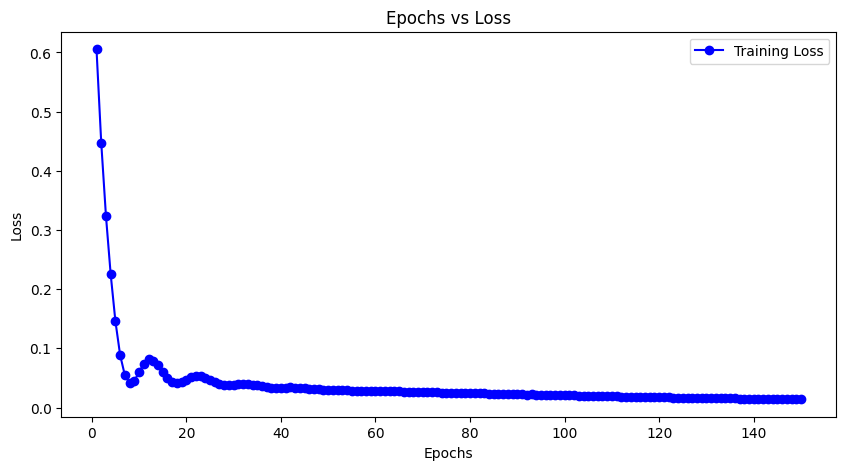

In [46]:
plot_loss_graph(loss_list)

In [48]:
# Example 1D tensors
print(x_tensor);

print(y_tensor);

x_tensor_d=x_tensor.squeeze()
y_tensor_d=y_tensor.squeeze()




# Ensure the tensors are 1D and have the same length
assert x_tensor_d.ndim == 1 and y_tensor_d.ndim == 1
assert len(x_tensor) == len(y_tensor)

# Create the mask and apply it
mask = x_tensor_d > 0.5
x_tensor3 = x_tensor_d[mask]
y_tensor3 = y_tensor_d[mask]


print(len(x_tensor_d));
print(len(x_tensor3));


tensor([[0.6989],
        [0.4791],
        [0.6601],
        ...,
        [0.3844],
        [0.4851],
        [0.2436]], grad_fn=<IndexBackward0>)
tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])
58520
15629


**RESULT - Prediction vs Actual**

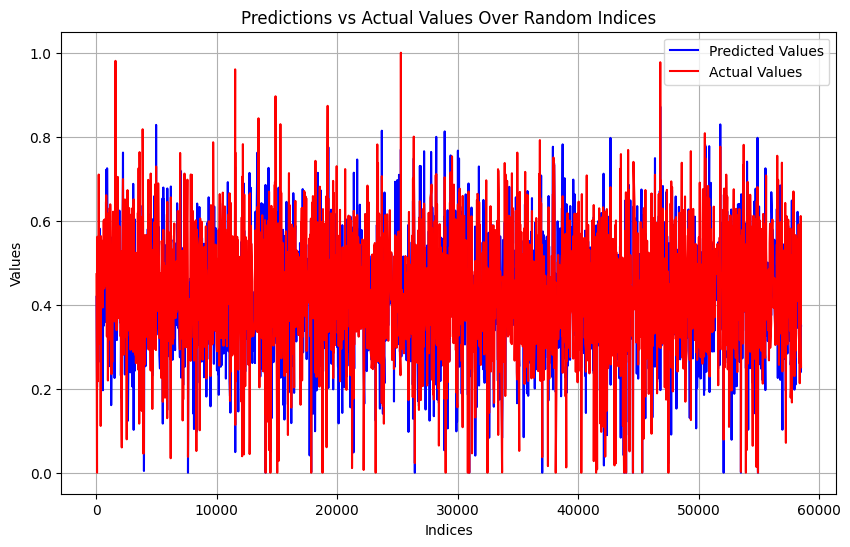

In [50]:
import numpy as np
import matplotlib.pyplot as plt



random_indices = np.random.choice(len(x_tensor),3000, replace=False)
random_indices_sorted = np.sort(random_indices)

# Select elements from tensor_x and tensor_y based on these indices
selected_tensor_x = x_tensor2[random_indices].detach()
selected_tensor_y = y_tensor[random_indices].detach()

plt.figure(figsize=(10, 6))

# Plotting the lines
plt.plot(random_indices_sorted, selected_tensor_x.numpy(), label='Predicted Values', color='blue')
plt.plot(random_indices_sorted, selected_tensor_y.numpy(), label='Actual Values', color='red')

plt.title("Predictions vs Actual Values Over Random Indices")
plt.xlabel("Indices")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
print(x_tensor);
print(x_tensor.max)
print(y_tensor);
x_tensor2=x_tensor

x_tensor2[x_tensor2 < 0] = 0

tensor([[0.6989],
        [0.4791],
        [0.6601],
        ...,
        [0.3844],
        [0.4851],
        [0.2436]], grad_fn=<IndexBackward0>)
<built-in method max of Tensor object at 0x7d897c672340>
tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])


RESULT = TSNE Embeding

In [51]:

print(x_tensor_emb)
print(x_tensor_emb.shape )
print(y_tensor_emb)
print(y_tensor_emb.shape )
y_mask=y_tensor_emb<1
y_tensor_emb2=y_tensor_emb[y_mask]
x_tensor_emb2=x_tensor_emb[y_mask]
rounded_y_tensor_emb2 = torch.round(y_tensor_emb2  * 10) / 10

print(x_tensor_emb2 )
print(y_tensor_emb2  )

print(rounded_y_tensor_emb2 )

tensor([[-0.5826, -0.4465, -0.5617,  ..., -0.2264,  0.1066, -0.1702],
        [-0.8872, -0.4865, -0.8175,  ..., -0.4271,  0.2180, -0.3442],
        [-0.8232, -0.4778, -0.7277,  ..., -0.3161,  0.2156, -0.2882],
        ...,
        [ 0.0262, -0.7120, -0.4157,  ..., -0.1208, -0.4226, -0.1806],
        [-0.0373, -0.7143, -0.2859,  ..., -0.0378, -0.2747, -0.3237],
        [-0.0105, -0.6337, -0.3405,  ..., -0.0924, -0.2608, -0.1800]],
       grad_fn=<IndexBackward0>)
torch.Size([58520, 7])
tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])
torch.Size([58520])
tensor([[-0.5826, -0.4465, -0.5617,  ..., -0.2264,  0.1066, -0.1702],
        [-0.8872, -0.4865, -0.8175,  ..., -0.4271,  0.2180, -0.3442],
        [-0.8232, -0.4778, -0.7277,  ..., -0.3161,  0.2156, -0.2882],
        ...,
        [ 0.0262, -0.7120, -0.4157,  ..., -0.1208, -0.4226, -0.1806],
        [-0.0373, -0.7143, -0.2859,  ..., -0.0378, -0.2747, -0.3237],
        [-0.0105, -0.6337, -0.3405,  ..., -0.0924, -0.2608, -0.1

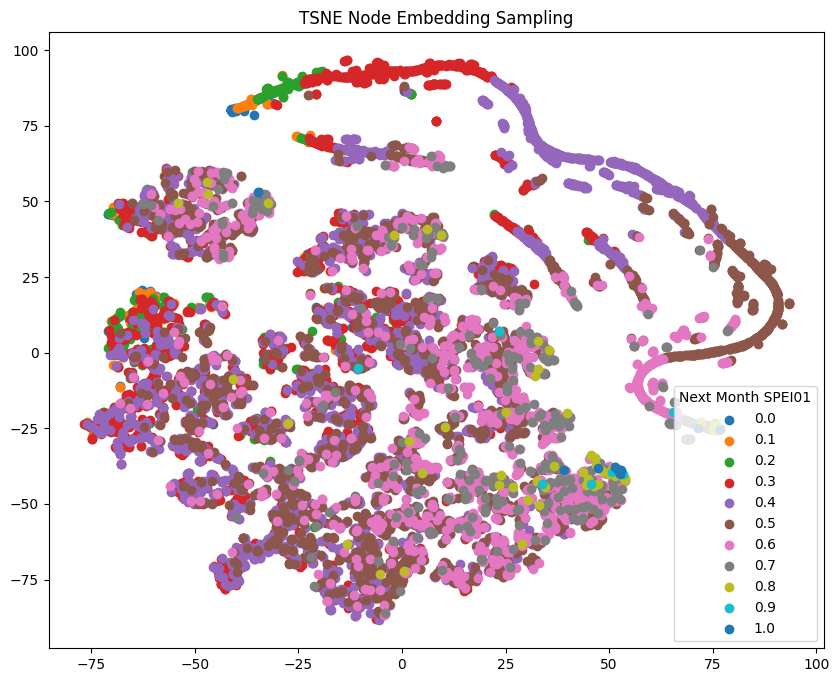

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Assuming x_tensor is your original large tensor
x_tensor =x_tensor_emb2  # Replace with your large tensor

# Assuming labels is a tensor or array of labels corresponding to each data point in x_tensor
labels = rounded_y_tensor_emb2
# Define the sample size
sample_size = 10000  # Adjust this to your desired sample size

# Ensure the sample size is not larger than the number of data points
if sample_size > x_tensor.size(0):
    sample_size = x_tensor.size(0)

# Randomly sample indices
indices = torch.randperm(x_tensor.size(0))[:sample_size]

# Select the samples and corresponding labels
sampled_x_tensor = x_tensor[indices]
sampled_labels = labels[indices]

# Detach and move to CPU, then convert to NumPy array
X_np = sampled_x_tensor.detach().cpu().numpy()

# Create a t-SNE instance: you can adjust parameters
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the sampled data
X_2d = tsne.fit_transform(X_np)

# Plot the transformed sampled data with labels
plt.figure(figsize=(10, 8))
for label in torch.unique(sampled_labels):
    idx = (sampled_labels == label)
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1],  label=f'{label:.1f}')

plt.title("TSNE Node Embedding Sampling")

plt.legend(title="Next Month SPEI01")
plt.show()


**Save Result**

In [53]:
print(x_tensor_test)


tensor([[0.4322],
        [0.4411],
        [0.4319],
        ...,
        [0.3534],
        [0.3389],
        [0.3014]], device='cuda:0')


In [54]:
print ( y_tensor_test)

tensor([0.4217, 0.4300, 0.4215,  ..., 0.3055, 0.2828, 0.2375], device='cuda:0')


In [69]:
import pandas as pd
import torch




# Assuming x_tensor_test and y_tensor_test are PyTorch tensors
# Example:
# x_tensor_test = torch.tensor([1.1, 2.2, 3.3])
# y_tensor_test = torch.tensor([1.0, 2.0, 3.0])




# Convert tensors to numpy arrays
x_features = graph_data.x.cpu().detach().numpy()  # Node features
y_actual = graph_data.y.cpu().detach().numpy()    # Actual values
test_mask = graph_data.test_mask.cpu().numpy()    # Test mask

# Apply test mask
x_features_test = x_features[test_mask]
y_actual_test = y_actual[test_mask]

# Assuming x_tensor_test is your predicted values tensor for the test set
# x_tensor_test = torch.tensor([...])

predicted_test = x_tensor_test.cpu().detach().numpy()
actual_test = y_tensor_test.cpu().detach().numpy()

# Create a DataFrame
# predicted_test = x_tensor_test.numpy()
# actual_test = y_tensor_test.numpy()

# Create a DataFrame
df_columns = [f'Feature_{i}' for i in range(x_features_test.shape[1])] + ['Predicted', 'Actual', 'Actual_org']
df_data = np.hstack((x_features_test, predicted_test.reshape(-1, 1), actual_test.reshape(-1, 1), y_actual_test.reshape(-1, 1)))
df = pd.DataFrame(df_data, columns=df_columns)

# Save the DataFrame to a file
file_path = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult0.csv'  # Adjust the path as needed
df.to_csv(file_path, index=False)

print(f'DataFrame saved to {file_path}')


DataFrame saved to /content/drive/MyDrive/DroughtCastAI/GNNTestRunresult0.csv


**Retrieve Result**

In [70]:
import pandas as pd

# Define the file path (adjust this to the location of your saved file)
file_path = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult0.csv'

# Load the DataFrame from the saved file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

# Use the .describe() method to get a statistical summary of the DataFrame
description = df.describe()

# Print the description
print(description)

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.334201   0.424086   0.414068   0.278462   0.846060   0.365647   
1   0.271991   0.494057   0.342901   0.300742   0.934387   0.168256   
2   0.292366   0.462789   0.372334   0.302574   0.939701   0.226852   
3   0.308521   0.549707   0.381113   0.295905   0.923007   0.216160   
4   0.331718   0.508391   0.350324   0.289753   0.832976   0.210220   

   Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0   0.353925   0.385227   0.234839   0.176332    0.083451    0.566873   
1   0.190538   0.227904   0.114245   0.144980    0.045033    0.612132   
2   0.209012   0.254745   0.134640   0.151744    0.031654    0.595937   
3   0.240424   0.306344   0.176766   0.177053    0.027715    0.561766   
4   0.240287   0.562232   0.361496   0.252398    0.028670    0.497300   

   Predicted    Actual  Actual_org  
0   0.432150  0.421736    0.421736  
1   0.441100  0.430036    0.430036  
2   0.431906  0.421511 